In [37]:
# from PIL import Image
# PIL 제거 버전 (cv2 사용)

import cv2
import os, glob
import numpy as np

category_dir = "./multi_cnn/train2"
categories = ["a-body", "a-closeup", "a-dna", "a-doctor", "a-head", 
              "a-knee", "a-leg_bone", "a-tooth", 
              "b-cartoon",
              "d-animal", "d-arm", "d-arrow", "d-bill",  "d-coin", "d-graph", 
              "d-lottery number", "d-lottery paper", "d-paint", 
              "d-text_architecture",
              "e-photo_product",
              "non_ad"]

len_categories = len(categories)

image_width, image_height = 64, 64

X = []
y = []
sum = 0 

for index, category in enumerate(categories):
    
    label = [0 for i in range(len_categories)]
    label[index] = 1
    
    image_dir = category_dir + "/" + category 
    files = glob.glob(image_dir+"/*.jpg") # 폴더 내 jpg 파일 탐색
    print(category, " 파일 길이: ", len(files)) # 카테코리마다 이미지 파일 개수 표시
    sum += len(files)
    
    for i, f in enumerate(files):
        
        try:
    
            image_bgr = cv2.imread(f, cv2.IMREAD_COLOR) # opencv는 BGR 값으로 받아들임
            image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB 값으로 변환

            img = cv2.resize(image_rgb, (image_width, image_height)) # 딥러닝 모델에 맞게 사이즈 재조정
            data = np.asarray(img)

            X.append(data)
            y.append(label)
            
        except:
            print(category, str(i + 1), "번째에서 에러") # 에러 파일 탐지
            pass

print('총 파일 길이: ', sum)

X = np.array(X)
y = np.array(y)

a-body  파일 길이:  52
a-closeup  파일 길이:  42
a-closeup 40 번째에서 에러
a-dna  파일 길이:  34
a-doctor  파일 길이:  26
a-head  파일 길이:  30
a-knee  파일 길이:  29
a-leg_bone  파일 길이:  17
a-tooth  파일 길이:  23
b-cartoon  파일 길이:  61
d-animal  파일 길이:  30
d-animal 12 번째에서 에러
d-arm  파일 길이:  18
d-arrow  파일 길이:  18
d-bill  파일 길이:  37
d-coin  파일 길이:  30
d-graph  파일 길이:  28
d-lottery number  파일 길이:  0
d-lottery paper  파일 길이:  0
d-paint  파일 길이:  14
d-text_architecture  파일 길이:  63
e-photo_product  파일 길이:  358
e-photo_product 13 번째에서 에러
e-photo_product 334 번째에서 에러
non_ad  파일 길이:  183
총 파일 길이:  1093


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(816, 64, 64, 3)
(273, 64, 64, 3)
(816, 21)
(273, 21)


In [39]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [41]:
"""
    VGG 모델 제거
    모델 경량화를 통한 정확도 향상

    gpu 에러 발생
    gpu의 낮은 성능(gtx 750ti)로 인해
    cpu로 모델 훈련 수행
"""

from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision

model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len_categories, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)            

In [43]:
history = model.fit(X_train, y_train, epochs=20, batch_size=30, verbose=1, validation_split=0.15)

Epoch 1/20
24/24 [==============================] - 2s 88ms/step - loss: 2.8375 - accuracy: 0.2915 - val_loss: 2.6850 - val_accuracy: 0.3577
Epoch 2/20
24/24 [==============================] - 2s 84ms/step - loss: 2.4107 - accuracy: 0.3290 - val_loss: 2.5865 - val_accuracy: 0.3577
Epoch 3/20
24/24 [==============================] - 2s 85ms/step - loss: 2.3114 - accuracy: 0.3319 - val_loss: 2.5559 - val_accuracy: 0.3659
Epoch 4/20
24/24 [==============================] - 2s 84ms/step - loss: 2.2009 - accuracy: 0.3319 - val_loss: 2.3929 - val_accuracy: 0.3659
Epoch 5/20
24/24 [==============================] - 2s 85ms/step - loss: 2.0587 - accuracy: 0.3377 - val_loss: 2.0402 - val_accuracy: 0.3659
Epoch 6/20
24/24 [==============================] - 2s 83ms/step - loss: 1.9273 - accuracy: 0.3954 - val_loss: 2.0261 - val_accuracy: 0.4390
Epoch 7/20
24/24 [==============================] - 2s 84ms/step - loss: 1.8194 - accuracy: 0.4358 - val_loss: 1.9306 - val_accuracy: 0.4228
Epoch 8/20
24

In [44]:
from sklearn.metrics import multilabel_confusion_matrix

y_pred = model.predict(X_test)
print(multilabel_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[[256   4]
  [ 10   3]]

 [[243  20]
  [  5   5]]

 [[260   3]
  [  5   5]]

 [[262   4]
  [  7   0]]

 [[261   7]
  [  4   1]]

 [[263   0]
  [  9   1]]

 [[267   1]
  [  4   1]]

 [[261   3]
  [  8   1]]

 [[252   9]
  [  9   3]]

 [[262   1]
  [  6   4]]

 [[269   0]
  [  3   1]]

 [[267   0]
  [  3   3]]

 [[262   0]
  [  9   2]]

 [[259   6]
  [  5   3]]

 [[266   3]
  [  4   0]]

 [[272   1]
  [  0   0]]

 [[251   6]
  [  8   8]]

 [[159  29]
  [ 13  72]]

 [[189  36]
  [ 21  27]]]


In [45]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(X_test, batch_size=30, verbose=1)

print(precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average=None)) # precision 개별 값
print(recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average=None))

print(precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='micro')) # precision 평균 값
print(recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='micro'))

10/10 [==============================] - 0s 14ms/step
[0.42857143 0.2        0.625      0.         0.125      1.
 0.5        0.25       0.25       0.8        1.         1.
 1.         0.33333333 0.         0.         0.57142857 0.71287129
 0.42857143]
[0.23076923 0.5        0.5        0.         0.2        0.1
 0.2        0.11111111 0.25       0.4        0.25       0.5
 0.18181818 0.375      0.         0.         0.5        0.84705882
 0.5625    ]
0.5128205128205128
0.5128205128205128


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
model.save("./model_saved.h5")

In [47]:
print(model.evaluate(X_test, y_test , batch_size=30)[1])

10/10 [==============================] - 0s 15ms/step - loss: 1.9733 - accuracy: 0.5128
0.5128205418586731


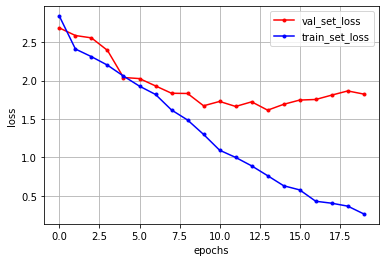

In [48]:
# 모델 손실 표시

import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

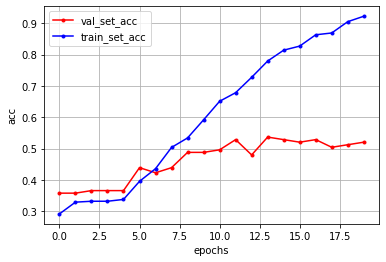

In [49]:
#모델 정확도 표시

y_vacc = history.history['val_accuracy'] # tensorflow 버전 변화로 acc -> accruacy로 변경
y_acc = history.history['accuracy']

x_len = np.arange(len(y_vacc))

plt.plot(x_len, y_vacc, marker='.', c='red', label='val_set_acc')
plt.plot(x_len, y_acc, marker='.', c='blue', label='train_set_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid()
plt.show()

In [51]:
from tensorflow.keras.models import load_model

# 테스트 이미지 분류 -> confusion matrix 평가

category_dir = "./multi_cnn/test"

image_width, image_height = 64, 64

X=[]
filenames = []
files = glob.glob(category_dir+"/*.*") # 테스트 폴더의 이미지 탐색

# opencv 사용, 파일 불러오기

for i, f in enumerate(files):
    
    image_bgr = cv2.imread(f, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB 값으로 변환
        
    img = cv2.resize(image_rgb, (image_width, image_height))
    data = np.asarray(img)
        
    X.append(data)
    
X = np.array(X)

model = load_model("./model_saved.h5") # 저장된 모델 호출
prediction = model.predict(X)

for i in prediction:
    pre_ans = i.argmax() # 가장 큰 값 저장
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    
    # 해당 카테고리를 구분
    # 특정 부분을 구별하여 하나의 카테고리롤 묶음
    
    if pre_ans == 0 or pre_ans == 1 or pre_ans == 2 or pre_ans == 3 or pre_ans == 4 or pre_ans == 5 or pre_ans == 6 or pre_ans == 7:
        pre_ans_str = "class a"
    elif pre_ans == 8:
        pre_ans_str = "class b"
    elif pre_ans == 9 or pre_ans == 10 or pre_ans == 11 or pre_ans == 12 or pre_ans == 13 or pre_ans == 14 or pre_ans == 15 or pre_ans == 16 or pre_ans == 17 or pre_ans == 18:
        pre_ans_str = "class d"
    elif pre_ans == 19:
        pre_ans_str = "class e"
    else:
        pre_ans_str = "non_ad"


    if pre_ans_str == "class a":
        print("해당 이미지는 " + pre_ans_str + "(으)로 추정됩니다.")
    elif pre_ans_str == "class b":
        print("해당 이미지는 " + pre_ans_str + "(으)로 추정됩니다.")
    elif pre_ans_str == "class d":
        print("해당 이미지는 " + pre_ans_str + "(으)로 추정됩니다.")
    elif pre_ans_str == "class e":
        print("해당 이미지는 " + pre_ans_str + "(으)로 추정됩니다.")
    elif pre_ans_str == "non_ad":
        print("해당 이미지는 " + pre_ans_str + "(으)로 추정됩니다.")

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.3619768e-26 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.6389599e-20
 1.0000000e+00]
20
해당 이미지는 non_ad(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
19
해당 이미지는 class e(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
19
해당 이미지는 class e(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
19
해당 이미지는 class e(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
20
해당 이미지는 non_ad(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
20
해당 이미지는 non_ad(으)로 추정됩니다.
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.2210359e-07 0.0000000e+00